<a href="https://colab.research.google.com/github/eher78/EMAR161-Abraham_Schaecher/blob/main/gamesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is a basic workflow of answering three questions I have about the dataset.**

First, we need to import pandas and take a look at the dataset in question.

In [110]:
# Import Pandas for Python Cleaning
import pandas as pd

In [111]:
data = pd.read_csv('games.csv')

In [112]:
# display 
print("Original 'input.csv' CSV Data: \n")
data.head()

Original 'input.csv' CSV Data: 



,Game,Developer,Publisher,Release date,Sales,Platform,Genre,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Super Mario World,Nintendo EAD,Nintendo,"November 21, 1990",20610000,Nintendo Entertainment System (NES),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Super Mario All-Stars,Nintendo EAD,Nintendo,"July 14, 1993",10550000,Nintendo Entertainment System (NES),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Donkey Kong Country,Rare,Nintendo,"November 21, 1994",9300000,Nintendo Entertainment System (NES),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Super Mario Kart,Nintendo EAD,Nintendo,"August 27, 1992",8760000,Nintendo Entertainment System (NES),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Street Fighter II: The World Warrior,Capcom,Capcom,"June 10, 1992",6300000,Nintendo Entertainment System (NES),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We then remove all the columns that have NaN all the way through. (Not necessary for my questions and also to reduce space).

In [113]:
data.pop('Genre')
data.head()

,Game,Developer,Publisher,Release date,Sales,Platform,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Super Mario World,Nintendo EAD,Nintendo,"November 21, 1990",20610000,Nintendo Entertainment System (NES),NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Super Mario All-Stars,Nintendo EAD,Nintendo,"July 14, 1993",10550000,Nintendo Entertainment System (NES),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Donkey Kong Country,Rare,Nintendo,"November 21, 1994",9300000,Nintendo Entertainment System (NES),NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Super Mario Kart,Nintendo EAD,Nintendo,"August 27, 1992",8760000,Nintendo Entertainment System (NES),NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Street Fighter II: The World Warrior,Capcom,Capcom,"June 10, 1992",6300000,Nintendo Entertainment System (NES),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
# Check which columns in terms of index has Unnamed values.
unnamed_cols  =  data.columns.str.contains('Unnamed')
unnamed_cols

array([False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True])

In [115]:
# Columns in index 6 and beyond should not be included. Hence, delete them!

data_new = data.drop(data[data.columns[unnamed_cols]], axis=1)
data_new.head()

,Game,Developer,Publisher,Release date,Sales,Platform
0,Super Mario World,Nintendo EAD,Nintendo,"November 21, 1990",20610000,Nintendo Entertainment System (NES)
1,Super Mario All-Stars,Nintendo EAD,Nintendo,"July 14, 1993",10550000,Nintendo Entertainment System (NES)
2,Donkey Kong Country,Rare,Nintendo,"November 21, 1994",9300000,Nintendo Entertainment System (NES)
3,Super Mario Kart,Nintendo EAD,Nintendo,"August 27, 1992",8760000,Nintendo Entertainment System (NES)
4,Street Fighter II: The World Warrior,Capcom,Capcom,"June 10, 1992",6300000,Nintendo Entertainment System (NES)


Now that we have cleaned the data, we can now answer some questions about the dataset.

# **1. How many unique platforms are in this dataset?**

In [116]:
# We take the dataset and create an array for the 'Platform' column. In summary, we are creating a list that tracks which values are in the list.
# If the value is not in the list, we add it!
# When all is said and done, we print the different platforms and count the length of the unique platforms of this company.

data = data_new

platforms = []
for i in data['Platform']:
  if i not in platforms:
    platforms.append(i)

print(platforms)
count = len(platforms)

print(f"We have {count} different platforms in this dataset.")

print("Those are: ")
for i in platforms:
  print(f"\t -{i}")

['Nintendo Entertainment System (NES)', 'Nintendo 64', 'Game Boy Advanced', 'GameCube', 'Nintendo DS', 'Wii', 'Nintendo 3DS', 'Nintendo Switch']
We have 8 different platforms in this dataset.
Those are: 
	 -Nintendo Entertainment System (NES)
	 -Nintendo 64
	 -Game Boy Advanced
	 -GameCube
	 -Nintendo DS
	 -Wii
	 -Nintendo 3DS
	 -Nintendo Switch


# **2. Plot a graph of total sales from first product to current.**

In [117]:
# See what data values we need to deal with.
data.head()

,Game,Developer,Publisher,Release date,Sales,Platform
0,Super Mario World,Nintendo EAD,Nintendo,"November 21, 1990",20610000,Nintendo Entertainment System (NES)
1,Super Mario All-Stars,Nintendo EAD,Nintendo,"July 14, 1993",10550000,Nintendo Entertainment System (NES)
2,Donkey Kong Country,Rare,Nintendo,"November 21, 1994",9300000,Nintendo Entertainment System (NES)
3,Super Mario Kart,Nintendo EAD,Nintendo,"August 27, 1992",8760000,Nintendo Entertainment System (NES)
4,Street Fighter II: The World Warrior,Capcom,Capcom,"June 10, 1992",6300000,Nintendo Entertainment System (NES)


In [118]:
#Data cleaning on one value
data['Release date'] = data['Release date'].replace(['33635'], 'February 1, 1992')


# For this, we want to sort from 1990 to the present. As such, words are not helpful. We want to convert to numbers!
data['Release date'] = pd.to_datetime(data['Release date'])
current = data.sort_values(by='Release date')
current

,Game,Developer,Publisher,Release date,Sales,Platform
0,Super Mario World,Nintendo EAD,Nintendo,1990-11-21,20610000,Nintendo Entertainment System (NES)
14,F-Zero,Nintendo EAD,Nintendo,1990-11-21,2850000,Nintendo Entertainment System (NES)
30,Final Fight,Capcom,Capcom,1990-12-21,1480000,Nintendo Entertainment System (NES)
20,Pilotwings,Nintendo EAD,Nintendo,1990-12-21,2000000,Nintendo Entertainment System (NES)
22,SimCity,Nintendo EAD,Nintendo,1991-04-26,1980000,Nintendo Entertainment System (NES)
...,...,...,...,...,...,...
427,Shin Megami Tensei V,Atlus,"JP: Atlus, NA: Sega, PAL: Nintendo",2021-11-11,1000000,Nintendo Switch
372,Pokémon Brilliant Diamond and Shining Pearl,ILCA,"The Pokémon Company, Nintendo",2021-11-19,14650000,Nintendo Switch
410,Big Brain Academy: Brain vs. Brain,Nintendo EPD,Nintendo,2021-12-03,1590000,Nintendo Switch
377,Pokémon Legends: Arceus,Game Freak,"The Pokémon Company, Nintendo",2022-01-28,12640000,Nintendo Switch


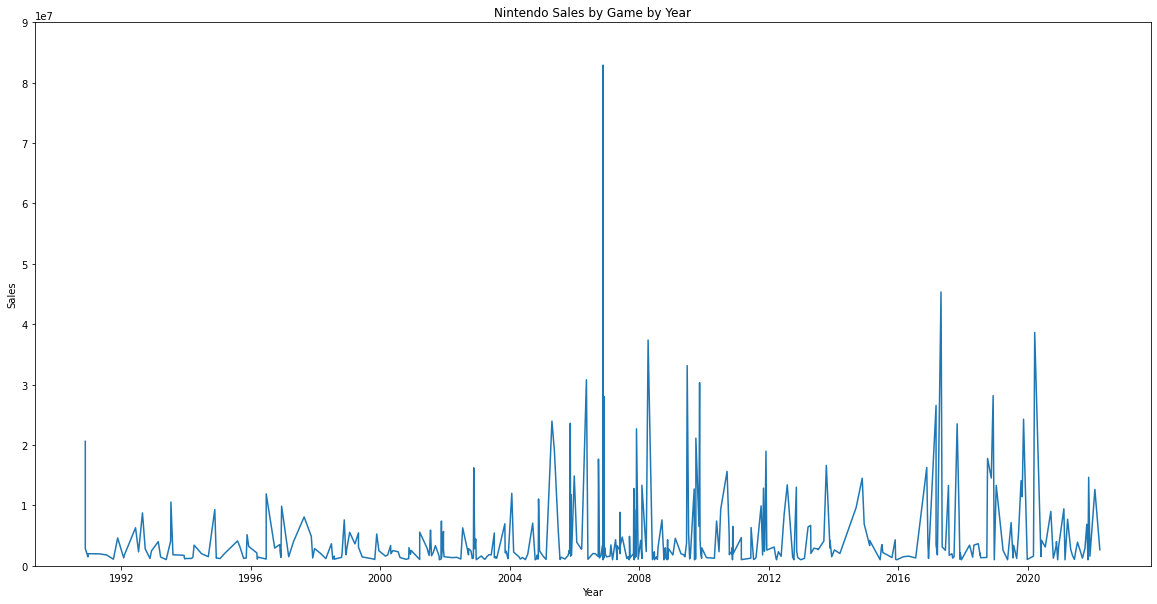

In [119]:
# Graph sales by game by year by selecitng axis and adjusting size and labels.

import matplotlib.pyplot as plt


date_array = current['Release date']
sales_array = current['Sales']

plt.figure(figsize=(20, 10))
plt.title('Nintendo Sales by Game by Year')

plt.xlabel('Year')
plt.ylabel('Sales')

ax = plt.gca()
ax.set_ylim(0, 90000000)

import numpy as np

plt.plot(date_array, sales_array)



# **3. Can we find the total sales by year?**

This requires a little more work than usual but it is still possible. 

In [120]:
# We want to only have year for the date and then group by year for the sum.

current['year'] = pd.DatetimeIndex(current['Release date']).year
current

totals = current.groupby('year').sum()
totals

,Sales
year,
1990,26940000
1991,9480000
1992,26800000
1993,31410000
1994,21440000
1995,21420000
1996,39750000
1997,22620000
1998,28244765


In [121]:
# This is not a complete table due to not having an index. We need to reset the index.

totals = totals.reset_index()
totals

,year,Sales
0,1990,26940000
1,1991,9480000
2,1992,26800000
3,1993,31410000
4,1994,21440000
5,1995,21420000
6,1996,39750000
7,1997,22620000
8,1998,28244765
9,1999,30300000


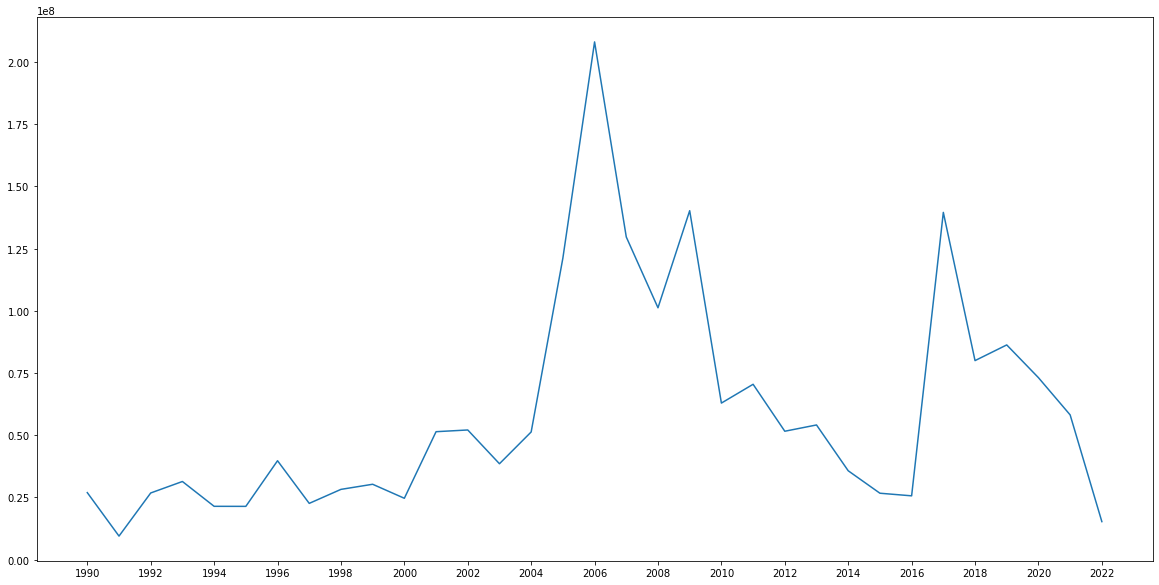

In [122]:
# Plot the graph by selecting axis and adjusting size.

years = totals['year']
totalSales = totals['Sales']

# Line plot

plt.figure(figsize=(20, 10))
plt.xticks(ticks=years)
plt.locator_params(axis='x', nbins=18)
plt.plot(years, totalSales)


<BarContainer object of 33 artists>

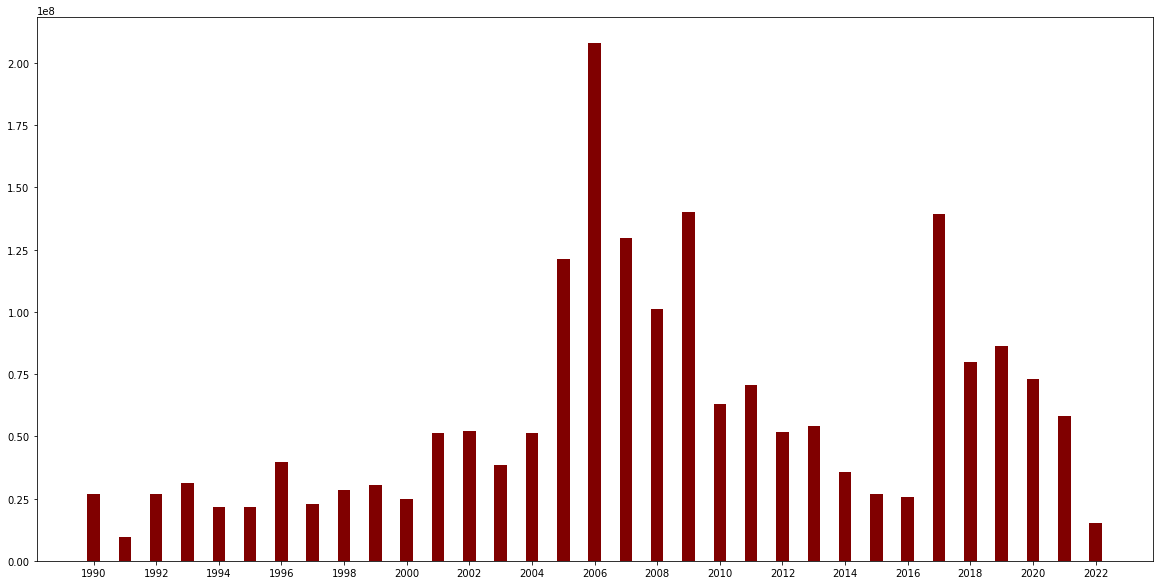

In [123]:
# Bar plot
plt.figure(figsize=(20, 10))
plt.xticks(ticks=years)
plt.locator_params(axis='x', nbins=18)
plt.bar(years[0:], totalSales, color ='maroon',
        width = 0.4)

# **4. The two main outliers are in 2006 and in 2017. What was the highest selling games for those two years?**

In [124]:
# Check database.
current

,Game,Developer,Publisher,Release date,Sales,Platform,year
0,Super Mario World,Nintendo EAD,Nintendo,1990-11-21,20610000,Nintendo Entertainment System (NES),1990
14,F-Zero,Nintendo EAD,Nintendo,1990-11-21,2850000,Nintendo Entertainment System (NES),1990
30,Final Fight,Capcom,Capcom,1990-12-21,1480000,Nintendo Entertainment System (NES),1990
20,Pilotwings,Nintendo EAD,Nintendo,1990-12-21,2000000,Nintendo Entertainment System (NES),1990
22,SimCity,Nintendo EAD,Nintendo,1991-04-26,1980000,Nintendo Entertainment System (NES),1991
...,...,...,...,...,...,...,...
427,Shin Megami Tensei V,Atlus,"JP: Atlus, NA: Sega, PAL: Nintendo",2021-11-11,1000000,Nintendo Switch,2021
372,Pokémon Brilliant Diamond and Shining Pearl,ILCA,"The Pokémon Company, Nintendo",2021-11-19,14650000,Nintendo Switch,2021
410,Big Brain Academy: Brain vs. Brain,Nintendo EPD,Nintendo,2021-12-03,1590000,Nintendo Switch,2021
377,Pokémon Legends: Arceus,Game Freak,"The Pokémon Company, Nintendo",2022-01-28,12640000,Nintendo Switch,2022


In [135]:
# Basically for both years, select all the games from 2006 and 2017, and figure out the top selling game of the year by sorting.
#Only want year.

dateAndAmount = current
value2006 = dateAndAmount.loc[dateAndAmount['year'] == 2006]
value2006.head()

final2006 = value2006.sort_values(by="Sales", ascending = False)

new = final2006.reset_index()

del new['index']

game2006 = new['Game'][0]
print(game2006)

print(f"\nThe highest selling game of 2006 is {game2006}.")

Wii Sports 

The highest selling game of 2006 is Wii Sports .


In [134]:
# Similar idea for 2017
dateAndAmount = current
value2017 = dateAndAmount.loc[dateAndAmount['year'] == 2017]
value2017.head()

final2017 = value2017.sort_values(by="Sales", ascending = False)

new = final2017.reset_index()

del new['index']

game2017 = new['Game'][0]
print(game2017)

print(f"\nThe highest selling game of 2017 is {game2017}.")

Mario Kart 8 Deluxe

The highest selling game of 2017 is Mario Kart 8 Deluxe.
